In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
instancias = pd.read_csv('dataSets\\2021_instancias.csv', encoding='latin-1')
instancias.head()

,nombre,apellido,edad,correo electrónico,id_nacional,nacionalidad,tipo_de_challenge,categoría_persona
0,Christopher,Young,23,parkerrachel@example.com,E07913891,Romania,Donacion,Seguidor
1,Mary,Clark,32,conwaymarissa@example.org,V40024269,Zimbabwe,NaN,Persona
2,Ashley,Thompson,35,tammy56@example.com,R15958823,El Salvador,Presencial,Seguidor
3,Beth,Stein,18,kelleymitchell@example.org,K47461495,Germany,NaN,Persona
4,Pamela,Cook,59,brittany55@example.org,Q88915654,Netherlands Antilles,Donacion,Seguidor


In [3]:
instancias.shape

(5972, 8)

In [4]:
resultados = pd.read_csv('dataSets\\anio2021_resultados.csv')
resultados

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
0,2021-92,Donacion,discontinuado,2021-01-03 10:30:00,2021-01-19 10:30:00,CANADA
1,2021-84,Donacion,discontinuado,2021-01-01 10:30:00,2021-01-22 10:30:00,BELARUS
2,2021-86,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,IRELAND
3,2021-90,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,UNITED STATES
4,2021-89,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-24 10:30:00,ECUADOR
...,...,...,...,...,...,...
398,2022-480,Donacion,en curso,2022-01-16 10:30:00,NaN,ETHIOPIA
399,2022-482,Donacion,en curso,2022-01-24 10:30:00,NaN,SYRIAN ARAB REPUBLIC
400,2022-483,Presencial,en curso,2022-01-24 10:30:00,NaN,SYRIAN ARAB REPUBLIC
401,2022-485,Donacion,en curso,2022-01-27 10:30:00,NaN,UGANDA


In [5]:
resultados["fecha_inicio"] = pd.to_datetime(resultados["fecha_inicio"])
resultados["fecha_fin"] = pd.to_datetime(resultados["fecha_fin"])

In [6]:
resultados.fecha_inicio.min()

Timestamp('2021-01-01 10:30:00')

In [7]:
resultados.fecha_inicio.max()

Timestamp('2022-01-30 10:30:00')

##### Vamos a filtrar todos los registros que no pertenezcan al año 2021

In [8]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_challenge       403 non-null    object        
 1   tipo_de_challenge  403 non-null    object        
 2   resultado          403 non-null    object        
 3   fecha_inicio       403 non-null    datetime64[ns]
 4   fecha_fin          274 non-null    datetime64[ns]
 5   pais_destinatario  403 non-null    object        
dtypes: datetime64[ns](2), object(4)
memory usage: 19.0+ KB


In [9]:
resultados2021 = resultados[resultados.fecha_inicio.dt.year == 2021].copy()

In [10]:
resultados2021.shape

(373, 6)

# KPI: Paises en los que operó la ONG 

<Axes: ylabel='suma_challenges'>

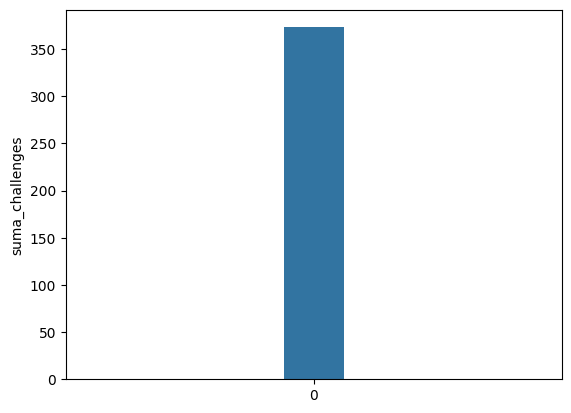

In [11]:
suma_challenges = len(resultados2021['id_challenge'].unique())
df_suma = pd.DataFrame({'suma_challenges': [suma_challenges]})
sns.barplot(data=df_suma, x=df_suma.index, y='suma_challenges', width = 0.12)

In [12]:
df_suma

,suma_challenges
0,373


In [13]:
resultados2021['id_challenge'].value_counts().sum()

373

#### Esa es la cantidad de challenges creados en 2021, 373 challenges.

In [14]:
fecha_fin = resultados2021.loc[resultados['fecha_fin'].isna()]
fecha_fin

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
219,2021-91,Traductor,exitoso,2021-01-03 10:30:00,NaT,CHAD
220,2021-87,Donacion,exitoso,2021-01-01 10:30:00,NaT,PAPUA NEW GUINEA
221,2021-85,Donacion,exitoso,2021-01-01 10:30:00,NaT,HUNGARY
222,2021-93,Traductor,exitoso,2021-01-06 10:30:00,NaT,BELGIUM
223,2021-88,Donacion,exitoso,2021-01-01 10:30:00,NaT,PORTUGAL
...,...,...,...,...,...,...
375,2021-449,Simulacro,exitoso,2021-12-26 10:30:00,NaT,ITALY
376,2021-448,Presencial,exitoso,2021-12-25 10:30:00,NaT,ZAMBIA
380,2021-451,Donacion,exitoso,2021-12-27 10:30:00,NaT,HUNGARY
381,2021-452,Presencial,exitoso,2021-12-28 10:30:00,NaT,SLOVENIA


In [15]:
resultados2021 = resultados2021.sort_values(by='fecha_inicio', ascending=True)
resultados2021 = resultados2021.reset_index(drop=True)
resultados2021.head()

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
0,2021-84,Donacion,discontinuado,2021-01-01 10:30:00,2021-01-22 10:30:00,BELARUS
1,2021-86,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,IRELAND
2,2021-90,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,UNITED STATES
3,2021-89,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-24 10:30:00,ECUADOR
4,2021-85,Donacion,exitoso,2021-01-01 10:30:00,NaT,HUNGARY


In [16]:
resultados2021['fecha_inicio'] = pd.to_datetime(resultados2021['fecha_inicio'])

In [17]:
resultados2021

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
0,2021-84,Donacion,discontinuado,2021-01-01 10:30:00,2021-01-22 10:30:00,BELARUS
1,2021-86,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,IRELAND
2,2021-90,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,UNITED STATES
3,2021-89,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-24 10:30:00,ECUADOR
4,2021-85,Donacion,exitoso,2021-01-01 10:30:00,NaT,HUNGARY
...,...,...,...,...,...,...
368,2021-452,Presencial,exitoso,2021-12-28 10:30:00,NaT,SLOVENIA
369,2021-453,Donacion,discontinuado,2021-12-29 10:30:00,2022-01-14 10:30:00,BELARUS
370,2021-455,Donacion,discontinuado,2021-12-30 10:30:00,2022-01-25 10:30:00,SPAIN
371,2021-454,Traductor,exitoso,2021-12-30 10:30:00,2022-01-13 10:30:00,BRAZIL


In [18]:
terminados = resultados2021.loc[(resultados2021['resultado']!='en curso')]

In [19]:
terminados.head(5)

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
0,2021-84,Donacion,discontinuado,2021-01-01 10:30:00,2021-01-22 10:30:00,BELARUS
1,2021-86,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,IRELAND
2,2021-90,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,UNITED STATES
3,2021-89,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-24 10:30:00,ECUADOR
4,2021-85,Donacion,exitoso,2021-01-01 10:30:00,NaT,HUNGARY


In [20]:
terminados = terminados.reset_index(drop=True)
terminados

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
0,2021-84,Donacion,discontinuado,2021-01-01 10:30:00,2021-01-22 10:30:00,BELARUS
1,2021-86,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,IRELAND
2,2021-90,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,UNITED STATES
3,2021-89,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-24 10:30:00,ECUADOR
4,2021-85,Donacion,exitoso,2021-01-01 10:30:00,NaT,HUNGARY
...,...,...,...,...,...,...
368,2021-452,Presencial,exitoso,2021-12-28 10:30:00,NaT,SLOVENIA
369,2021-453,Donacion,discontinuado,2021-12-29 10:30:00,2022-01-14 10:30:00,BELARUS
370,2021-455,Donacion,discontinuado,2021-12-30 10:30:00,2022-01-25 10:30:00,SPAIN
371,2021-454,Traductor,exitoso,2021-12-30 10:30:00,2022-01-13 10:30:00,BRAZIL


In [21]:
terminados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_challenge       373 non-null    object        
 1   tipo_de_challenge  373 non-null    object        
 2   resultado          373 non-null    object        
 3   fecha_inicio       373 non-null    datetime64[ns]
 4   fecha_fin          263 non-null    datetime64[ns]
 5   pais_destinatario  373 non-null    object        
dtypes: datetime64[ns](2), object(4)
memory usage: 17.6+ KB


In [22]:
df_terminados = terminados.groupby(pd.Grouper(key='fecha_inicio', freq='M'))['resultado'].value_counts()

In [23]:
df_terminados 

fecha_inicio  resultado    
2021-01-31    discontinuado    12
              exitoso          12
2021-02-28    discontinuado    24
              exitoso           5
2021-03-31    discontinuado    13
              exitoso           9
2021-04-30    discontinuado    22
              exitoso           6
2021-05-31    discontinuado    11
              exitoso          11
2021-06-30    discontinuado    22
              exitoso           9
2021-07-31    discontinuado    25
              exitoso           9
2021-08-31    exitoso          21
              discontinuado    16
2021-09-30    discontinuado    22
              exitoso          18
2021-10-31    discontinuado    21
              exitoso          14
2021-11-30    exitoso          25
              discontinuado     7
2021-12-31    exitoso          22
              discontinuado    17
Name: resultado, dtype: int64

In [24]:
por_mes = df_terminados.to_frame().rename(columns={'resultado' : 'conteo'}).reset_index()

In [25]:
exitosos_por_mes = por_mes[por_mes['resultado'] == 'exitoso'].reset_index(drop = True).copy()
discontinuados_por_mes = por_mes[por_mes['resultado'] == 'discontinuado'].reset_index(drop = True).copy()

In [26]:
exitosos_por_mes

,fecha_inicio,resultado,conteo
0,2021-01-31,exitoso,12
1,2021-02-28,exitoso,5
2,2021-03-31,exitoso,9
3,2021-04-30,exitoso,6
4,2021-05-31,exitoso,11
5,2021-06-30,exitoso,9
6,2021-07-31,exitoso,9
7,2021-08-31,exitoso,21
8,2021-09-30,exitoso,18
9,2021-10-31,exitoso,14


In [27]:
exitosos_por_mes['cambio_porcentual'] = exitosos_por_mes['conteo'].pct_change()

In [28]:
exitosos_prct_acum = exitosos_por_mes['cambio_porcentual'].sum()
exitosos_prct_acum *100

216.8816738816739

In [29]:
#exitosos_por_mes = exitosos_por_mes.fillna(0.0)

In [30]:
#discontinuados_por_mes = discontinuados_por_mes.fillna(0.0)

In [31]:
porcentaje = (resultados2021['resultado'].value_counts() / len(resultados2021) * 100).round(1)

In [32]:
porcentaje

discontinuado    56.8
exitoso          43.2
Name: resultado, dtype: float64

In [33]:
labels = ['discontinuado', 'exitoso']
colors = sns.color_palette('pastel')[0:2]

## Porcentaje de challenges cumplidos por año

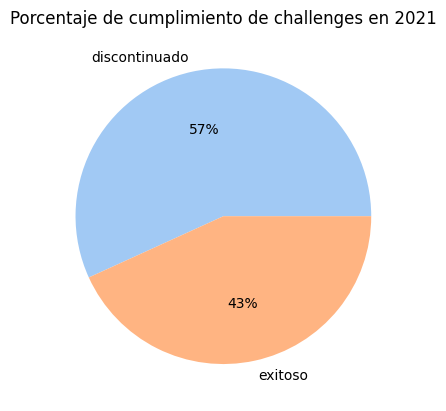

In [34]:
plt.pie(porcentaje, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Porcentaje de cumplimiento de challenges en 2021')
plt.show()

In [35]:
exitosos_por_mes

,fecha_inicio,resultado,conteo,cambio_porcentual
0,2021-01-31,exitoso,12,NaN
1,2021-02-28,exitoso,5,-0.583333
2,2021-03-31,exitoso,9,0.800000
3,2021-04-30,exitoso,6,-0.333333
4,2021-05-31,exitoso,11,0.833333
5,2021-06-30,exitoso,9,-0.181818
6,2021-07-31,exitoso,9,0.000000
7,2021-08-31,exitoso,21,1.333333
8,2021-09-30,exitoso,18,-0.142857
9,2021-10-31,exitoso,14,-0.222222


In [36]:
discontinuados_por_mes['cambio_porcentual'] = discontinuados_por_mes['conteo'].pct_change()

In [37]:
cambio_prct = [ discontinuados_por_mes.fecha_inicio.dt.to_period('M').tolist(),
                discontinuados_por_mes.cambio_porcentual.tolist(),
               exitosos_por_mes.cambio_porcentual.tolist()]

In [38]:
prct = pd.DataFrame({'periodo': cambio_prct[0],
                     'cambio_prct_discontinuados':cambio_prct[1],
                     'cambio_prct_exitosos' : cambio_prct[2]})

In [39]:
prct2021 = prct[prct.periodo != '2022-01']

In [40]:
prct2021

,periodo,cambio_prct_discontinuados,cambio_prct_exitosos
0,2021-01,NaN,NaN
1,2021-02,1.000000,-0.583333
2,2021-03,-0.458333,0.800000
3,2021-04,0.692308,-0.333333
4,2021-05,-0.500000,0.833333
5,2021-06,1.000000,-0.181818
6,2021-07,0.136364,0.000000
7,2021-08,-0.360000,1.333333
8,2021-09,0.375000,-0.142857
9,2021-10,-0.045455,-0.222222


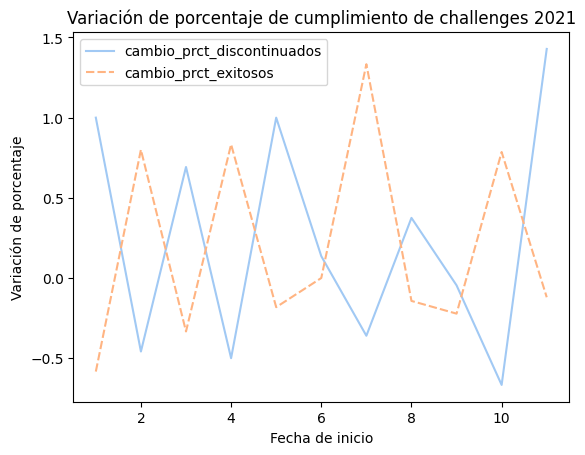

In [41]:
sns.lineplot(data=prct2021, palette=sns.color_palette('pastel', 2))
plt.xlabel('Fecha de inicio')
plt.ylabel('Variación de porcentaje')
plt.title('Variación de porcentaje de cumplimiento de challenges 2021')
plt.show()

In [42]:
filtered_prct =prct2021[1:].copy()

Text(0.5, 1.0, 'Tasa de Cambio Porcentual 2021')

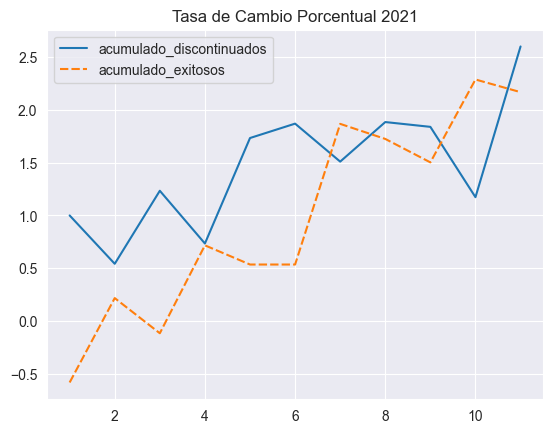

In [43]:
filtered_prct['acumulado_discontinuados'] = filtered_prct['cambio_prct_discontinuados'].cumsum().copy()
filtered_prct['acumulado_exitosos'] = filtered_prct['cambio_prct_exitosos'].cumsum().copy()

# Plotear gráfico de líneas
sns.set_style("darkgrid")
sns.lineplot(data=filtered_prct[['acumulado_discontinuados', 'acumulado_exitosos']])
plt.title('Tasa de Cambio Porcentual 2021')

In [44]:
top_ten_countries = resultados2021['pais_destinatario'].value_counts().head(10)
top_ten_countries

UNITED STATES    13
AUSTRIA          13
ECUADOR          11
IRAQ             11
IRELAND          11
SPAIN            11
MACAO            11
BELARUS          10
BRAZIL           10
CANADA           10
Name: pais_destinatario, dtype: int64

In [45]:
ten_countries = ['UNITED STATES', 'AUSTRIA', 'IRAQ', 'IRELAND', 'MACAO', 'SPAIN', 'ECUADOR', 'CHAD', 'CANADA', 'BRAZIL']

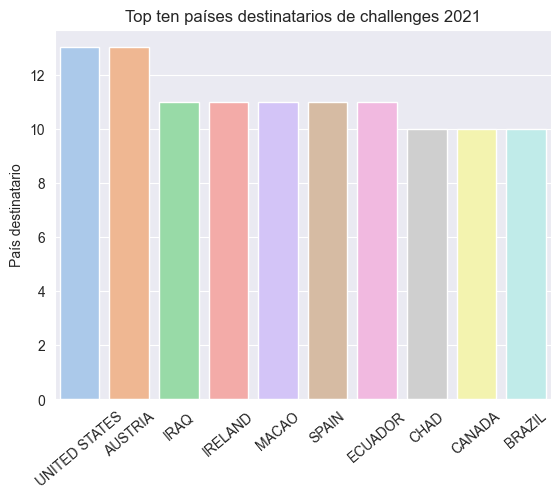

In [46]:
sns.barplot(
    x=ten_countries,
    y=top_ten_countries,
    palette = sns.color_palette('pastel', 10)
)
plt.xticks(rotation = 40)
plt.ylabel('País destinatario')
plt.title('Top ten países destinatarios de challenges 2021')
plt.show()

In [47]:
tipoChallenge_resultado = resultados2021.groupby('tipo_de_challenge')['resultado'].value_counts().reset_index(name='total')

In [48]:
tipoChallenge_resultado

,tipo_de_challenge,resultado,total
0,Abogado,exitoso,12
1,Donacion,discontinuado,141
2,Donacion,exitoso,94
3,Presencial,discontinuado,62
4,Presencial,exitoso,25
5,Simulacro,discontinuado,4
6,Simulacro,exitoso,2
7,Traductor,exitoso,28
8,Traductor,discontinuado,5


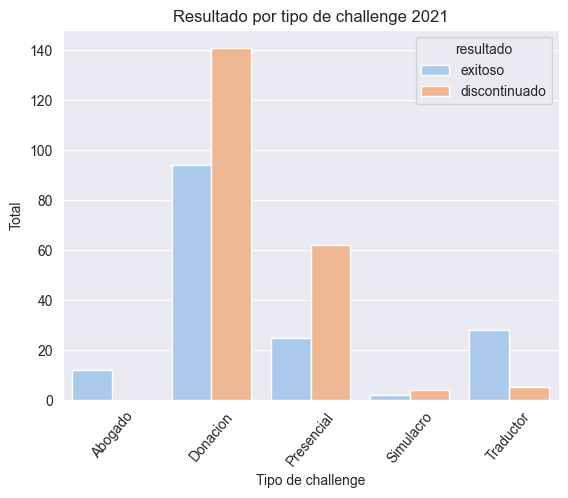

In [49]:
sns.barplot(
    x='tipo_de_challenge',
    y='total',
    hue='resultado',
    data=tipoChallenge_resultado,
    palette = sns.color_palette('pastel', 3)
)
plt.xticks(rotation = 50)
plt.ylabel('Total')
plt.xlabel('Tipo de challenge')
plt.title('Resultado por tipo de challenge 2021')
plt.show()

In [50]:
paises_colab = pd.read_csv('dataSets\\paises_colab.csv')
paises_colab.head()

,paises_colab
0,CHAD
1,PAPUA NEW GUINEA
2,HUNGARY
3,BELGIUM
4,PORTUGAL


In [51]:
paises_colab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   paises_colab  120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [52]:
paises_colab.value_counts()

paises_colab        
HUNGARY                 6
BRAZIL                  6
ZAMBIA                  5
UNITED STATES           5
SWITZERLAND             5
SPAIN                   5
BELGIUM                 5
NORWAY                  4
IRELAND                 4
IRAQ                    4
AFGHANISTAN             4
COLOMBIA                4
CHAD                    4
ECUADOR                 3
MALTA                   3
AUSTRIA                 3
CHILE                   3
BELARUS                 3
SLOVENIA                3
CANADA                  3
NEW ZEALAND             3
NEPAL                   3
UNITED KINGDOM          2
SYRIAN ARAB REPUBLIC    2
SWEDEN                  2
JORDAN                  2
MALAYSIA                2
FINLAND                 2
FRANCE                  2
GERMANY                 2
MACAO                   2
SINGAPORE               1
AUSTRALIA               1
ISRAEL                  1
ITALY                   1
JAPAN                   1
RUSSIA                  1
PORTUGAL         

In [53]:
paises_colab.drop_duplicates().value_counts().sum()

45

## Análisis trimestral de los challenges cumplidos

In [54]:
resultados2021.head()

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
0,2021-84,Donacion,discontinuado,2021-01-01 10:30:00,2021-01-22 10:30:00,BELARUS
1,2021-86,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,IRELAND
2,2021-90,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-23 10:30:00,UNITED STATES
3,2021-89,Presencial,discontinuado,2021-01-01 10:30:00,2021-01-24 10:30:00,ECUADOR
4,2021-85,Donacion,exitoso,2021-01-01 10:30:00,NaT,HUNGARY


In [55]:
resultados2021.tail()

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
368,2021-452,Presencial,exitoso,2021-12-28 10:30:00,NaT,SLOVENIA
369,2021-453,Donacion,discontinuado,2021-12-29 10:30:00,2022-01-14 10:30:00,BELARUS
370,2021-455,Donacion,discontinuado,2021-12-30 10:30:00,2022-01-25 10:30:00,SPAIN
371,2021-454,Traductor,exitoso,2021-12-30 10:30:00,2022-01-13 10:30:00,BRAZIL
372,2021-456,Donacion,exitoso,2021-12-30 10:30:00,NaT,BELGIUM


### Veamos el porcentaje de challenges cumplidos en cada trimestre (KPI)

In [56]:
trim1_2021 = resultados2021[resultados2021['fecha_inicio'].dt.month <= 3].copy()

In [57]:
trim_dos2021 = resultados2021[(resultados2021['fecha_inicio'].dt.month >= 4) & (resultados2021['\
fecha_inicio'].dt.month <= 6)].copy()

In [58]:
trim3_2021 = resultados2021[(resultados2021['fecha_inicio'].dt.month >= 7) & (resultados2021['\
fecha_inicio'].dt.month <= 9)].copy()

In [59]:
cuarto_t2021 = resultados2021[(resultados2021['fecha_inicio'].dt.month >= 10) & (resultados2021['\
fecha_inicio'].dt.month <= 12)].copy()

In [60]:
porcentaje = (trim1_2021['resultado'].value_counts() / len(trim1_2021) * 100).round(1)

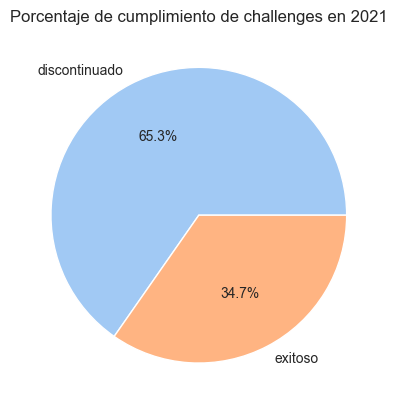

In [61]:
plt.pie(porcentaje, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Porcentaje de cumplimiento de challenges en 2021')
plt.show()

In [62]:
porcentaje = (trim_dos2021['resultado'].value_counts() / len(trim_dos2021) * 100).round(1)

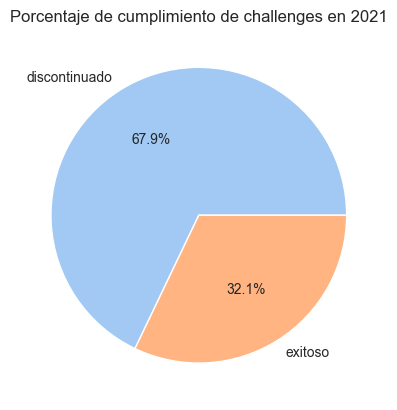

In [63]:
plt.pie(porcentaje, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Porcentaje de cumplimiento de challenges en 2021')
plt.show()

In [64]:
porcentaje = (trim3_2021['resultado'].value_counts() / len(trim3_2021) * 100).round(1)

In [65]:
trim3_2021['resultado'].value_counts() / len(trim3_2021) * 100

discontinuado    56.756757
exitoso          43.243243
Name: resultado, dtype: float64

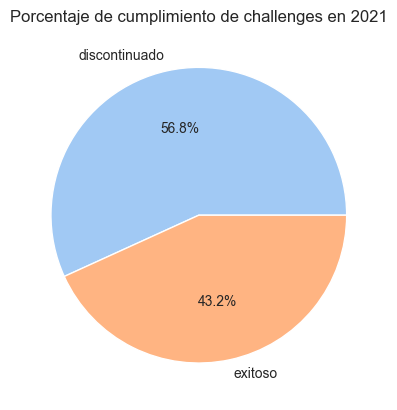

In [66]:
plt.pie(porcentaje, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Porcentaje de cumplimiento de challenges en 2021')
plt.show()

In [67]:
trim3_2021

,id_challenge,tipo_de_challenge,resultado,fecha_inicio,fecha_fin,pais_destinatario
156,2021-241,Donacion,exitoso,2021-07-01 10:30:00,NaT,MALTA
157,2021-240,Donacion,discontinuado,2021-07-01 10:30:00,2021-07-12 10:30:00,FRANCE
158,2021-243,Presencial,discontinuado,2021-07-01 10:30:00,2021-07-23 10:30:00,BELARUS
159,2021-245,Donacion,discontinuado,2021-07-01 10:30:00,2021-07-12 10:30:00,SWEDEN
160,2021-244,Donacion,discontinuado,2021-07-01 10:30:00,2021-07-22 10:30:00,AUSTRALIA
...,...,...,...,...,...,...
262,2021-346,Simulacro,discontinuado,2021-09-23 10:30:00,2021-10-15 10:30:00,GERMANY
263,2021-347,Donacion,discontinuado,2021-09-24 10:30:00,2021-10-16 10:30:00,GERMANY
264,2021-348,Presencial,discontinuado,2021-09-26 10:30:00,2021-10-18 10:30:00,MACAO
265,2021-349,Donacion,discontinuado,2021-09-27 10:30:00,2021-10-19 10:30:00,NEPAL


In [68]:
porcentaje = (cuarto_t2021['resultado'].value_counts() / len(cuarto_t2021) * 100).round(1)

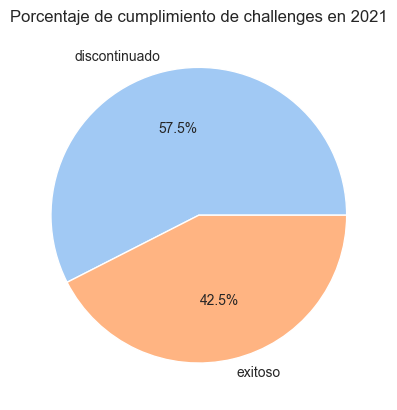

In [69]:
plt.pie(porcentaje, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Porcentaje de cumplimiento de challenges en 2021')
plt.show()

# KPI: Cantidad de países en los que operó la ONG (Año 2021)

<Axes: ylabel='suma_pais_destinatario'>

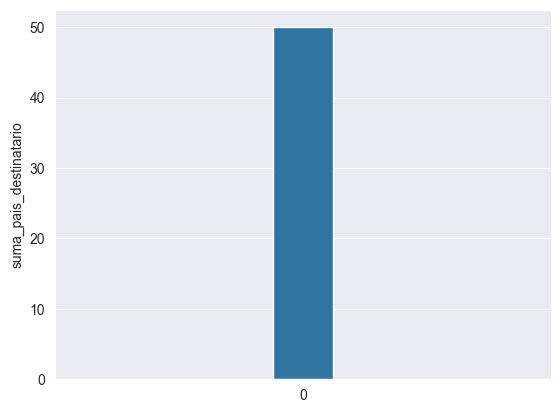

In [70]:
suma_paises_destinatarios = len(resultados2021['pais_destinatario'].unique())
df_suma = pd.DataFrame({'suma_pais_destinatario': [suma_paises_destinatarios]})
sns.barplot(data=df_suma, x=df_suma.index, y='suma_pais_destinatario', width = 0.12)

In [71]:
df_suma

,suma_pais_destinatario
0,50


## KPI:  Promedio de Países A los que ayudamos por trimestre 

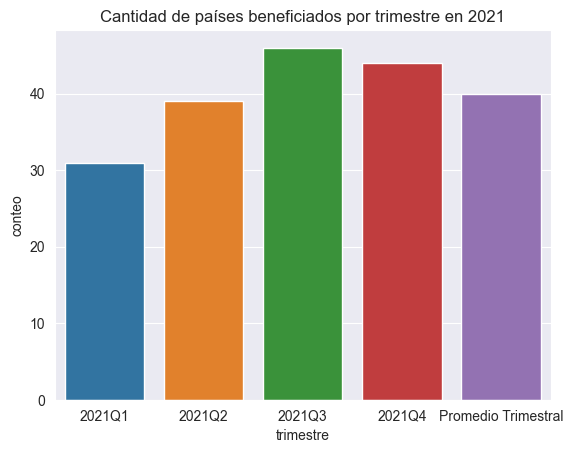

In [72]:
# Creamos una columna de trimestres
resultados2021['trimestre'] = pd.PeriodIndex(resultados2021['fecha_inicio'], freq='Q')

# Agrupamos por trimestre y contamos valores únicos de países
counts = resultados2021.groupby('trimestre')['pais_destinatario'].nunique()

# Reseteamos el índice y renombrar la columna de conteos
counts = counts.reset_index(name='conteo')
# Promediamoslos primeros cuatro valores de 'conteo'
promedio = counts.iloc[:4, 1].mean() 
counts.loc[len(counts)] = ['Promedio Trimestral', promedio]

# Hacemos el gráfico de barras con Seaborn
sns.barplot(x='trimestre', y='conteo', data=counts)

plt.title('Cantidad de países beneficiados por trimestre en 2021')
plt.show()


In [73]:
counts.conteo.min()    # Trimestre con menor cantidad de países a los que asistimos. Trimestre 1

31.0

In [74]:
counts.conteo.max()  # Trimestre con mayor cantidad de países a los que asistimos. Trimestre 3

46.0

In [75]:
promedio

40.0

# KPI: ONGs que colaboran con la ONG clienta 

In [76]:
ong_colab = pd.read_csv('dataSets\\ongs_colab_ultimo.csv')
ong_colab.head()

,ongs_colab
0,Geração Solidária
1,Yuwa Foundation
2,Esperanza para Todos
3,Hope for All
4,Ação Voluntária


<Axes: ylabel='suma_ongs'>

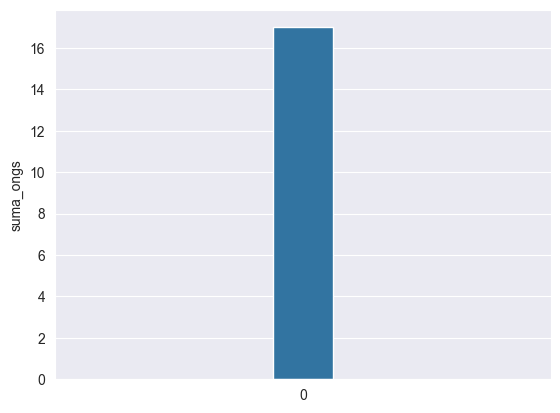

In [77]:
suma_ongs = len(ong_colab['ongs_colab'].unique())
df_suma = pd.DataFrame({'suma_ongs': [suma_ongs]})
sns.barplot(data=df_suma, x=df_suma.index, y='suma_ongs', width = 0.12)

In [78]:
len(ong_colab.ongs_colab.unique())

17

In [79]:
ong_colab.value_counts()

ongs_colab               
Horizontes Abiertos          4
Ação Voluntária              3
Esperanza para Todos         3
Acción Humanitaria           3
Hope for All                 2
Aiuto per il Futuro          2
Oikonomikí Drási             2
Yuwa Foundation              2
Cambio Positivo              1
Ayuda Comunitaria            1
Geração Solidária            1
KinderAid                    1
Migrant Hope Foundation      1
Nuevo horizonte              1
Solidaridad Internacional    1
Sostegno Vita                1
The Bamboo Project           1
dtype: int64

In [80]:
ong_colab.drop_duplicates().value_counts().sum()

17